In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("../Data/processed_data/cleaned_reviews.csv")

In [3]:
df.head()

,cleaned_text,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [4]:
df['review_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

In [5]:
df.loc[21434: 21444]

,cleaned_text,sentiment,review_length
21434,movie bad looked like home movie one scene cam...,negative,58
21435,warning potential viewer experimental film nat...,positive,132
21436,bit slow boring tale old man wife living delap...,positive,35
21437,although movie slow dreamlike almost mesmerizi...,negative,73
21438,dont recall walking movie theater except frien...,negative,40
21439,disappointed waiting year repeatsthe dvd origi...,negative,65
21440,always nice see angela bassett getting role re...,positive,107
21441,far providing caffeine kick youd expect film s...,negative,187
21442,okay film woman twin disturbing vision sister ...,negative,58
21443,set skenbart follows failed swedish book edito...,negative,156


In [6]:
average_length = df['review_length'].mean()
max_length = df['review_length'].max()
min_length = df['review_length'].min()

print(f'Average Length: {average_length}')
print(f'Max length: {max_length}')
print(f'Min length: {min_length}')

Average Length: 118.60262
Max length: 1420
Min length: 3


C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_24664\2928031538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


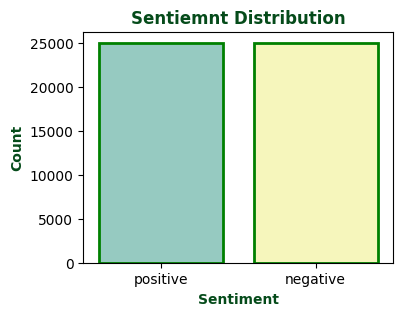

In [42]:
plt.figure(figsize=(4,3))
sns.barplot(
    x=df['sentiment'].value_counts().index,
    y=df['sentiment'].value_counts().values,
    palette='Set3',
    edgecolor='green',
    linewidth=2
)
plt.title('Sentiemnt Distribution', color='#054B1A', fontweight='bold')  
plt.xlabel('Sentiment', color="#054B1A", fontweight='bold')            
plt.ylabel('Count', color='#054B1A', fontweight='bold')
plt.show()    

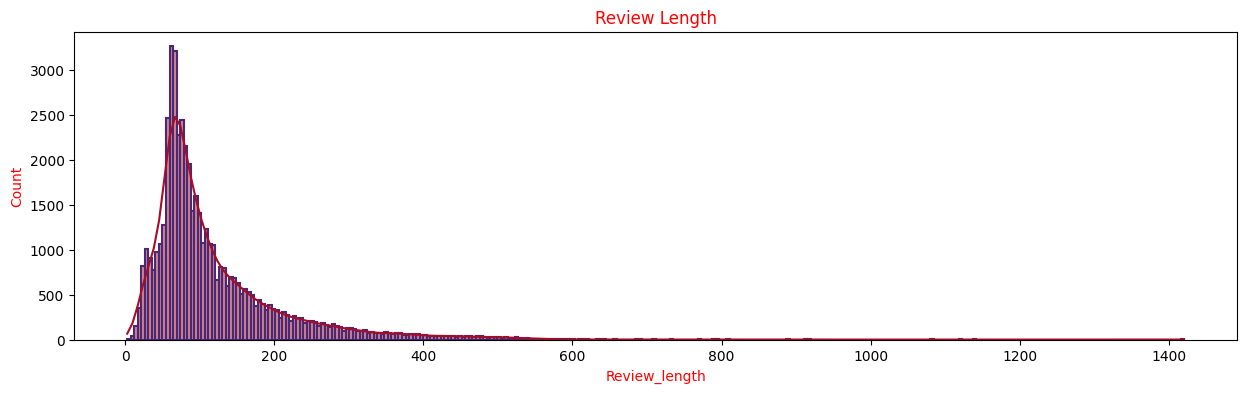

In [55]:
plt.figure(figsize=(15, 4))
sns.histplot(
    data=df,
    x='review_length',
    bins=300,
    color="#A80C26",
    edgecolor="#492874",
    linewidth=1.5,
    kde=True
)
plt.title('Review Length', color= 'red')
plt.xlabel('Review_length', color='red')
plt.ylabel('Count', color='red')
plt.show()

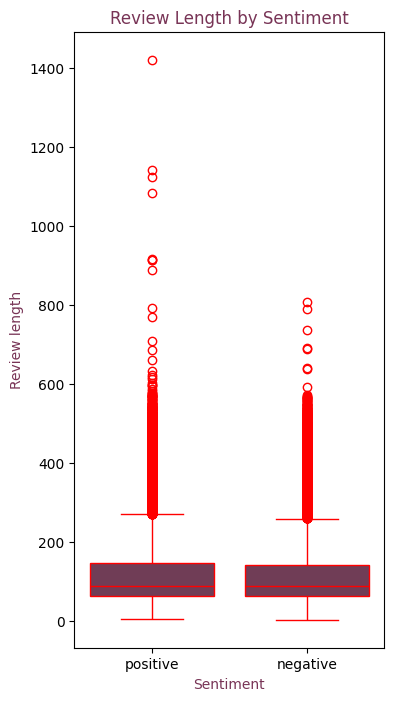

In [52]:
plt.figure(figsize=(4, 8))
sns.boxplot(
    data=df,
    x='sentiment',
    y='review_length',
    color='#783456',
    linecolor='red'
)
plt.title("Review Length by Sentiment", color='#783456')
plt.xlabel("Sentiment", color='#783456')
plt.ylabel('Review length', color='#783456')
plt.show()

In [ ]:
all_text = " ".join(df['cleaned_text'])

In [29]:
all_words = all_text.split()
word_count = Counter(all_words)
most_common_word = word_count.most_common(40)
print(f'Top 40 most common word:\n {most_common_word}')

Top 40 most common word:
 [('movie', 99023), ('film', 89807), ('one', 52676), ('like', 39790), ('time', 29394), ('good', 28617), ('character', 27573), ('get', 24434), ('even', 24286), ('story', 24227), ('would', 24001), ('make', 23564), ('see', 23494), ('really', 22904), ('scene', 20706), ('much', 18896), ('well', 18629), ('people', 17979), ('great', 17803), ('bad', 17673), ('also', 17491), ('show', 16870), ('first', 16844), ('dont', 16635), ('way', 16535), ('thing', 16083), ('made', 15414), ('could', 15142), ('think', 15080), ('life', 14394), ('go', 14285), ('know', 14075), ('watch', 13686), ('love', 13383), ('many', 13263), ('seen', 13097), ('actor', 13011), ('two', 12935), ('plot', 12886), ('say', 12854)]


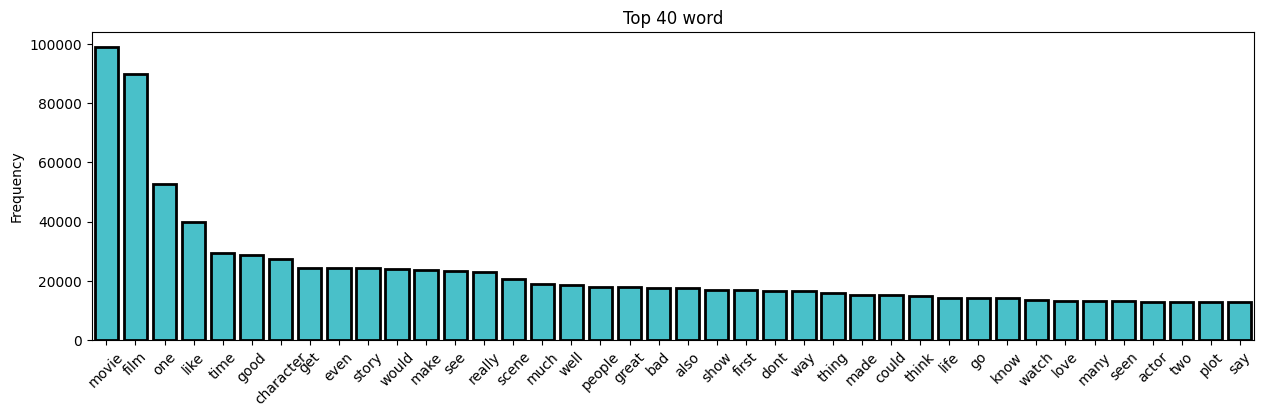

In [32]:
words, count = zip(*most_common_word)
plt.figure(figsize=(15,4))
sns.barplot(
    x=words,
    y=count,
    color="#33D3DF",
    edgecolor='black',
    linewidth=2
)
plt.title("Top 40 word")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [34]:
positive_word = " ".join(df[df['sentiment'] == 'positive']['cleaned_text']).split()
pos_count = Counter(positive_word).most_common(15)

negative_word = " ".join(df[df['sentiment'] == 'negative']['cleaned_text']).split()
neg_count = Counter(negative_word).most_common(15)

In [35]:
print(f'Positive top 15 word: {pos_count}')
print(f'Negative Top 15 word: {neg_count}')

Positive top 15 word: [('film', 47894), ('movie', 43133), ('one', 26958), ('like', 17541), ('time', 15196), ('good', 14420), ('story', 13647), ('character', 13630), ('great', 12694), ('see', 12532), ('get', 11095), ('well', 11080), ('make', 10988), ('really', 10676), ('also', 10553)]
Negative Top 15 word: [('movie', 55890), ('film', 41913), ('one', 25718), ('like', 22249), ('even', 14921), ('time', 14198), ('good', 14197), ('bad', 14095), ('character', 13943), ('would', 13633), ('get', 13339), ('make', 12576), ('really', 12228), ('scene', 11013), ('see', 10962)]


In [38]:
def create_cloud(string, title=None):
    cloud = WordCloud(
        height=400,
        width=800,
        background_color="#85D495",
        min_font_size=10
    ).generate(string)

    plt.figure(figsize=(15,10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontdict={'fontsize': 18})
    plt.show()

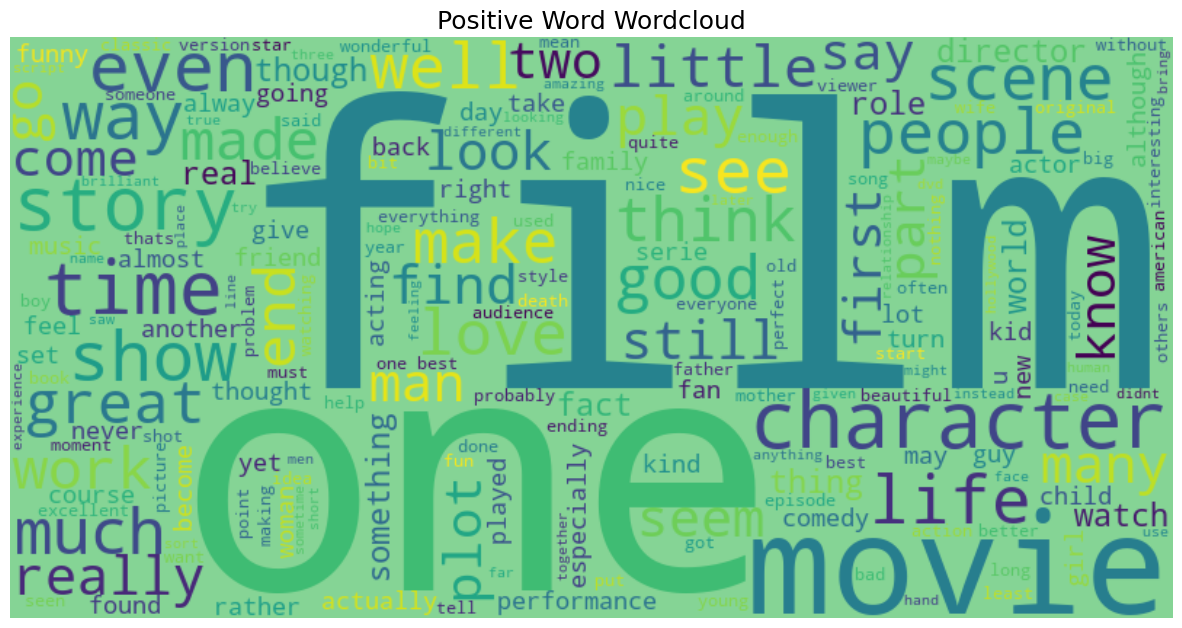

In [39]:
create_cloud(" ".join(positive_word), "Positive Word Wordcloud")

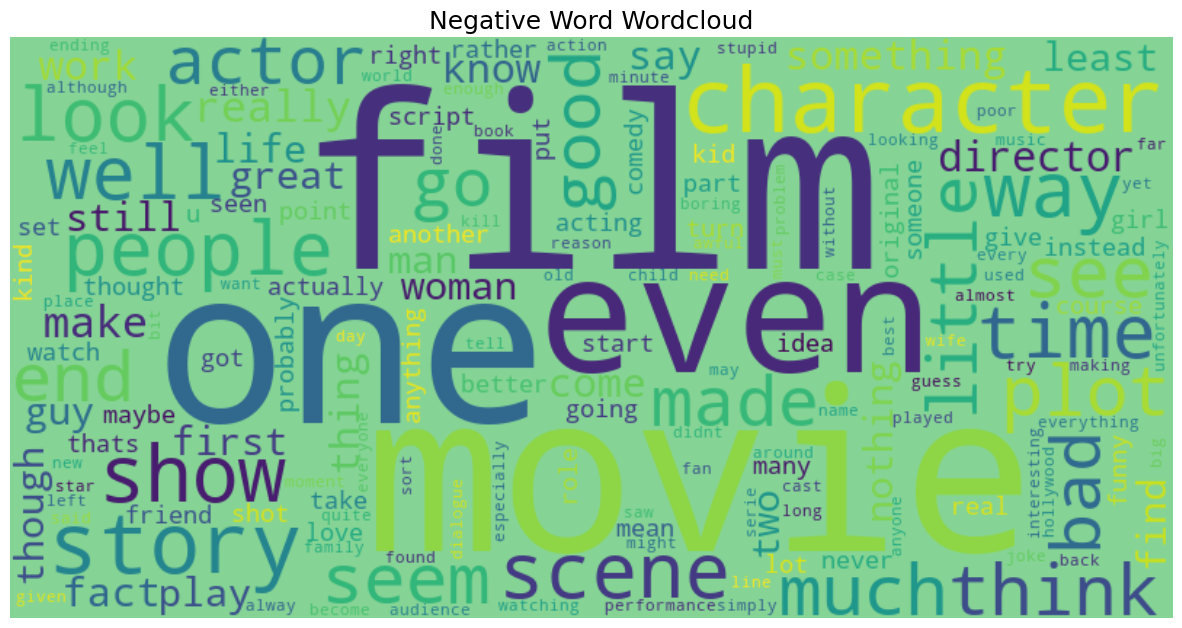

In [40]:
create_cloud(" ".join(negative_word), "Negative Word Wordcloud")